In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
#import datetime
from pandas import DataFrame
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
os.chdir("C:\Work_NN\PythonDirectory\Sales_prediction")

In [4]:
df=pd.read_excel('inputfile_salesPred.xlsx')
df.head()

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs,Active Month,SalesPerMonth,cig_index,...,TaxJurisdiction_MN-016,TaxJurisdiction_MO-027,TaxJurisdiction_NY-53,TaxJurisdiction_OH-014,TaxJurisdiction_OH-033,TaxJurisdiction_PA-055,TaxJurisdiction_SC-059,TaxJurisdiction_TN-088,TaxJurisdiction_WI-008,TaxJurisdiction_WV-032
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20,12,26.029167,1786.1,...,0,0,0,0,0,0,0,0,0,0
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4,12,551.350000,188.0,...,0,0,0,0,0,0,0,0,0,0
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14,12,86.764167,5780.0,...,0,0,0,0,0,0,0,0,0,0
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7,12,1311.601667,8181.7,...,0,0,0,0,0,0,0,0,0,0
5,10036,2256.23,00161000009lKUiAAM,32.0,MI,CSTORE-OVER 800SQFT,8,12,188.019167,2143.9,...,0,0,0,0,0,0,0,0,0,0


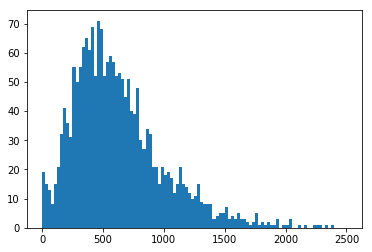

In [63]:

#fig, ax = plt.hist(1, 1, figsize=(40,40))
plt.hist(df['SalesPerMonth'],bins=100,range=(0,2500))
plt.show()

In [64]:
df1=df[df.SalesPerMonth.values >0]

In [65]:
 from scipy import stats

In [66]:
from scipy.stats import boxcox
transform = np.asarray(df1[['SalesPerMonth']].values)
#print (transform)  
# transform values and store as "dft"
dft = stats.boxcox(transform)[0]



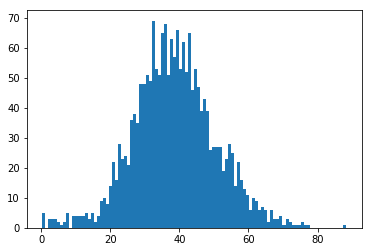

In [67]:
# plot the transformed data
plt.hist(dft, bins=100)
plt.show()

In [68]:
df1.head()

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs,Active Month,SalesPerMonth,cig_index,...,TaxJurisdiction_MN-016,TaxJurisdiction_MO-027,TaxJurisdiction_NY-53,TaxJurisdiction_OH-014,TaxJurisdiction_OH-033,TaxJurisdiction_PA-055,TaxJurisdiction_SC-059,TaxJurisdiction_TN-088,TaxJurisdiction_WI-008,TaxJurisdiction_WV-032
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20,12,26.029167,1786.1,...,0,0,0,0,0,0,0,0,0,0
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4,12,551.350000,188.0,...,0,0,0,0,0,0,0,0,0,0
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14,12,86.764167,5780.0,...,0,0,0,0,0,0,0,0,0,0
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7,12,1311.601667,8181.7,...,0,0,0,0,0,0,0,0,0,0
5,10036,2256.23,00161000009lKUiAAM,32.0,MI,CSTORE-OVER 800SQFT,8,12,188.019167,2143.9,...,0,0,0,0,0,0,0,0,0,0


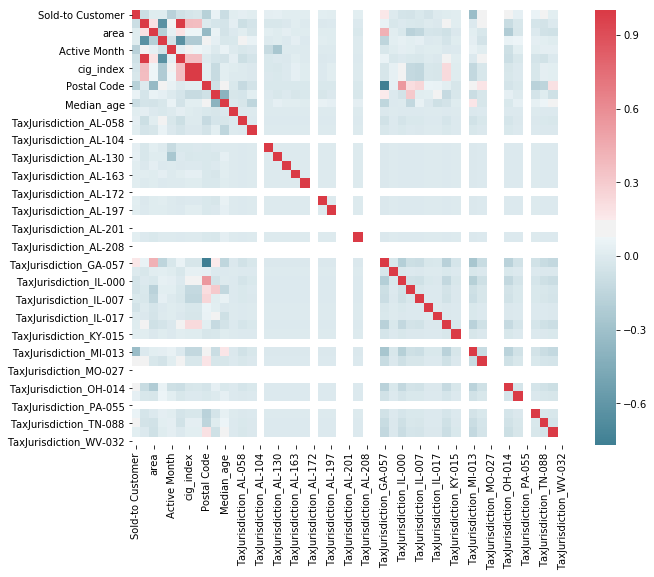

In [69]:
import seaborn as sns

f, ay = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ay)

In [78]:
df1.corr()

,Sold-to Customer,Sales,area,Number of GAPs,Active Month,SalesPerMonth,cig_index,MonthlyCigIndex,Postal Code,Population,...,TaxJurisdiction_MN-016,TaxJurisdiction_MO-027,TaxJurisdiction_NY-53,TaxJurisdiction_OH-014,TaxJurisdiction_OH-033,TaxJurisdiction_PA-055,TaxJurisdiction_SC-059,TaxJurisdiction_TN-088,TaxJurisdiction_WI-008,TaxJurisdiction_WV-032
Sold-to Customer,1.000000,-0.088106,0.009249,0.008130,-0.179232,-0.071681,-0.037492,-0.029493,-0.188165,0.056399,...,0.109859,NaN,NaN,0.082349,0.037526,NaN,0.061152,0.096504,0.020396,NaN
Sales,-0.088106,1.000000,0.196101,-0.633399,0.129767,0.993093,0.373169,0.369719,0.002127,-0.041302,...,0.100145,NaN,NaN,-0.101479,-0.024047,NaN,-0.042905,-0.057799,-0.006341,NaN
area,0.009249,0.196101,1.000000,-0.195093,0.045366,0.190917,0.076364,0.074193,-0.343605,0.057516,...,-0.029462,NaN,NaN,-0.214660,-0.036954,NaN,-0.007620,-0.064619,-0.067814,NaN
Number of GAPs,0.008130,-0.633399,-0.195093,1.000000,-0.051905,-0.633818,-0.217534,-0.217226,0.087690,0.038752,...,-0.057433,NaN,NaN,0.057108,0.070363,NaN,0.031340,0.019755,0.005704,NaN
Active Month,-0.179232,0.129767,0.045366,-0.051905,1.000000,0.036785,0.117601,0.076170,0.048967,0.000137,...,0.013847,NaN,NaN,-0.077966,0.019105,NaN,0.011453,0.029784,0.027197,NaN
SalesPerMonth,-0.071681,0.993093,0.190917,-0.633818,0.036785,1.000000,0.361937,0.363105,-0.001589,-0.041637,...,0.099543,NaN,NaN,-0.092349,-0.025734,NaN,-0.044282,-0.060342,-0.009330,NaN
cig_index,-0.037492,0.373169,0.076364,-0.217534,0.117601,0.361937,1.000000,0.998606,0.019260,-0.106619,...,-0.026760,NaN,NaN,-0.030904,-0.008338,NaN,-0.028343,0.026445,0.020366,NaN
MonthlyCigIndex,-0.029493,0.369719,0.074193,-0.217226,0.076170,0.363105,0.998606,1.000000,0.018617,-0.106912,...,-0.027248,NaN,NaN,-0.025040,-0.009208,NaN,-0.029102,0.025170,0.019149,NaN
Postal Code,-0.188165,0.002127,-0.343605,0.087690,0.048967,-0.001589,0.019260,0.018617,1.000000,-0.067952,...,0.180944,NaN,NaN,-0.047044,-0.020167,NaN,-0.173104,-0.153637,0.192445,NaN
Population,0.056399,-0.041302,0.057516,0.038752,0.000137,-0.041637,-0.106619,-0.106912,-0.067952,1.000000,...,-0.036762,NaN,NaN,0.034832,0.001844,NaN,-0.045550,0.008590,-0.068634,NaN


In [70]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X1 = df1[['MonthlyCigIndex','area','Number of GAPs','TaxJurisdiction_AL-058','TaxJurisdiction_IL-001',
                   'TaxJurisdiction_IL-007','TaxJurisdiction_IN-004','TaxJurisdiction_MI-013',
         'TaxJurisdiction_MN-016','TaxJurisdiction_OH-033','TaxJurisdiction_TN-088']]
X1 = sm.add_constant(X1)
y1 = df1['SalesPerMonth']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=42)
model = sm.OLS(y1, X1.astype(float)).fit()
predictions = model.predict(X1)
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:          SalesPerMonth   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     158.3
Date:                Tue, 03 Jul 2018   Prob (F-statistic):          1.05e-259
Time:                        12:12:02   Log-Likelihood:                -13614.
No. Observations:                1935   AIC:                         2.725e+04
Df Residuals:                    1923   BIC:                         2.732e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    710

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = df1[['MonthlyCigIndex','area','Number of GAPs','TaxJurisdiction_AL-058','TaxJurisdiction_IL-001',
                   'TaxJurisdiction_IL-007','TaxJurisdiction_IN-004','TaxJurisdiction_MI-013',
         'TaxJurisdiction_MN-016','TaxJurisdiction_OH-033','TaxJurisdiction_TN-088']]
X = sm.add_constant(X)
y =  df1['SalesPerMonth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model= RandomForestRegressor(n_estimators=100, max_depth=2)
model.fit(X_train,y_train)
y_pred=model.predict(X_test) 
accuracy=round(model.score(X_test, y_test)*100,2)
print(str(accuracy)+' percent')

38.4 percent


In [73]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 102423.46
Variance score: 0.38


In [75]:
from sklearn.linear_model import LinearRegression
reg1=LinearRegression()
X = df1[['MonthlyCigIndex','area','Number of GAPs','TaxJurisdiction_AL-058','TaxJurisdiction_IL-001',
                   'TaxJurisdiction_IL-007','TaxJurisdiction_IN-004','TaxJurisdiction_MI-013',
         'TaxJurisdiction_MN-016','TaxJurisdiction_OH-033','TaxJurisdiction_TN-088']]
X = sm.add_constant(X)
y =  df1['SalesPerMonth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
reg1.fit(X_train,y_train)
pred1=reg1.predict(X_test) 
accuracy=round(reg1.score(X_test, y_test)*100,2)
print(str(accuracy)+' percent')

38.0 percent


In [77]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
# The coefficients
#print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred1))

Mean squared error: 103096.10
Variance score: 0.38
